In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [55]:
df.drop(['Unnamed: 0','year','month'],axis='columns',inplace=True)

In [56]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [57]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [58]:
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


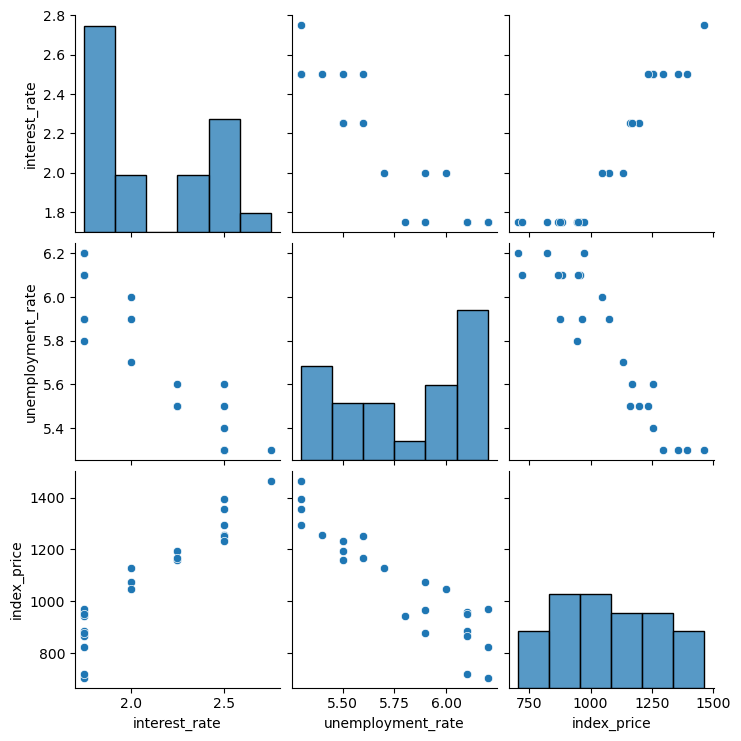

In [59]:
sns.pairplot(df)

In [60]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [61]:
x=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

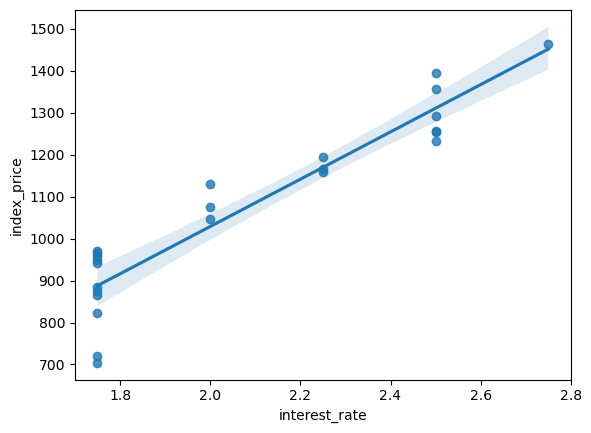

In [63]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

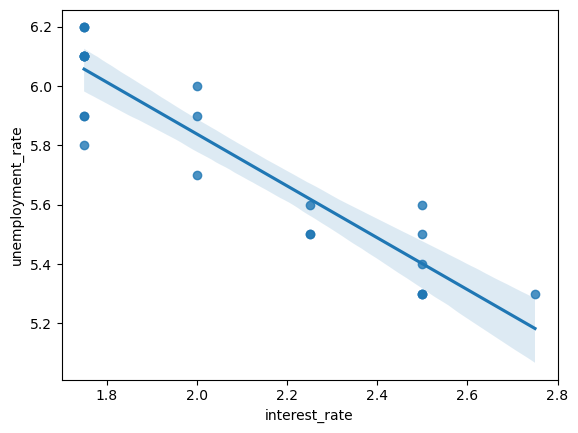

In [64]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

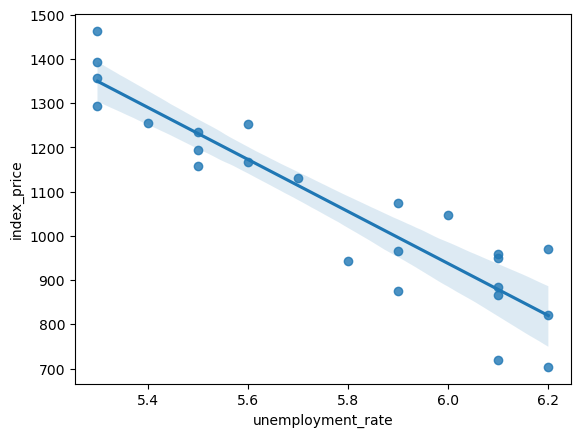

In [65]:
sns.regplot(x='unemployment_rate', y='index_price', data=df)

In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [67]:
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [68]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [69]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [72]:
np.mean(score)

-5914.828180162396

In [73]:
y_pred=model.predict(x_test)

In [74]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323556
76.11677139574813


In [77]:
from sklearn.metrics import r2_score
Score=r2_score(y_test,y_pred)
print(Score)
#display adjusted R-squared
print(1 - (1-Score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))

0.8278978091457142
0.713163015242857


In [78]:
model.coef_

array([  88.27275507, -116.25716066])

In [79]:
model.intercept_

1053.4444444444443